# Model Training - Polynomial Regression
Linear regression assumes the data has a linear pattern. If your data does not have a linear pattern you can consider a polynomial regression algorithm that provides a multi (poly) coefficient linear relationship between an independent variable and a dependent variable to predict the outcome of future events. We will now Train a Polynomial regression algorithm on the features you have engineered to see how closely we can predict the health outcomes for individuals.
# Step 1
Load dependencies


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
# Create a data frame from the csv file
training_data = pd.read_csv('1.3.2.training_data.csv')

x_name = ['Engagement']
y_name = 'Exam_Score'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

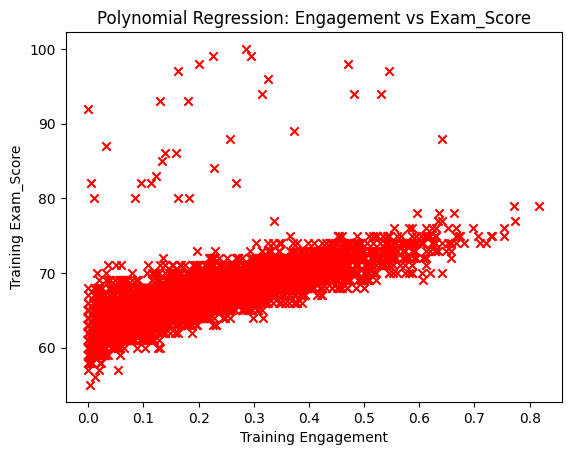

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the training data
training_data = pd.read_csv('1.3.2.training_data.csv')

# Define the feature and target
x_name = ['Engagement']
y_name = 'Exam_Score'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

# Plot the training data
if len(x_name) == 1:
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Polynomial Regression: Engagement vs Exam_Score")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig, ax = plt.subplots(1, len(x_name), figsize=(12, 3))
    for i in range(len(ax)):
        ax[i].scatter(x[:, i], y, label='Target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target")
    ax[0].legend()
    fig.suptitle("Polynomial Regression: Training Data")
plt.show()

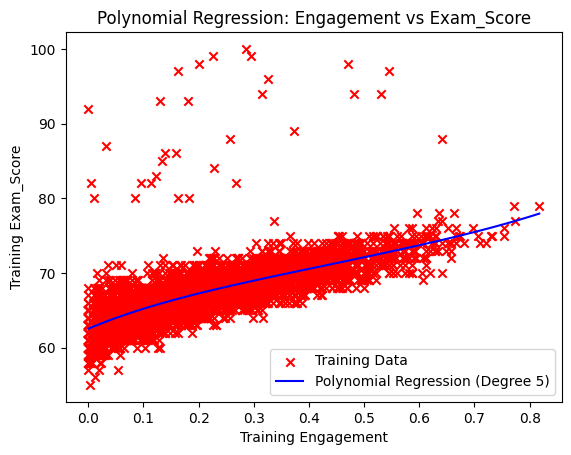

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load the training data
training_data = pd.read_csv('1.3.2.training_data.csv')

# Define the feature and target
x_name = ['Engagement']
y_name = 'Exam_Score'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

# Create polynomial features with degree 5 and fit the model
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(x)
my_model = LinearRegression()
my_model.fit(poly_features, y)

# Generate predictions for visualization
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = my_model.predict(x_range_poly)

# Plot the training data and the polynomial regression curve
plt.scatter(x, y, marker='x', c='r', label='Training Data')
plt.plot(x_range, y_pred, label='Polynomial Regression (Degree 5)', color='blue')
plt.title("Polynomial Regression: Engagement vs Exam_Score")
plt.ylabel(f'Training {y_name}')
plt.xlabel(f'Training {x_name[0]}')
plt.legend()
plt.show()

In [5]:
import pickle

# Save the polynomial transformer
poly_filename = 'my_saved_poly_v5.pkl'
with open(poly_filename, 'wb') as file:
    pickle.dump(poly, file)

# Save the trained model
model_filename = 'my_saved_model_v5.sav'
with open(model_filename, 'wb') as file:
    pickle.dump(my_model, file)

print(f"Polynomial transformer saved as {poly_filename}")
print(f"Trained model saved as {model_filename}")

Polynomial transformer saved as my_saved_poly_v5.pkl
Trained model saved as my_saved_model_v5.sav


# Multifeature Polynomial Regression


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pickle

# Load the training data
training_data = pd.read_csv('1.3.2.training_data.csv')

# Define the features and target
x_names = ['Engagement', 'Knowledge', 'Attendance']  # Multiple features
y_name = 'Exam_Score'
x = np.array(training_data[x_names])
y = np.array(training_data[y_name])

# Create polynomial features with degree 3 (you can adjust the degree)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(x)

# Train the polynomial regression model
my_model = LinearRegression()
my_model.fit(poly_features, y)

# Print model coefficients and intercept
print("Model Coefficients:", my_model.coef_)
print("Model Intercept:", my_model.intercept_)

# Save the polynomial transformer and model for later use
poly_filename = '5degpolymulti.pkl'
model_filename = '5degpolymulti.sav'

with open(poly_filename, 'wb') as file:
    pickle.dump(poly, file)
with open(model_filename, 'wb') as file:
    pickle.dump(my_model, file)

print(f"Polynomial transformer saved as {poly_filename}")
print(f"Trained model saved as {model_filename}")

Model Coefficients: [ 1.63950305e+02  4.17799103e+00 -4.22739085e+01 -7.36083398e+01
  3.60464677e+01 -7.08316933e+02  8.45095009e+01 -9.15690746e+01
  2.42461170e+02 -1.25293637e+03  8.79736658e+02  1.91308260e+03
  3.46417396e+02 -1.23566181e+03  7.43033752e+02 -3.86899392e+02
 -3.65504681e+02  7.07596262e+02 -4.73129767e+02  5.18835455e+03
 -3.90715476e+03 -5.83875900e+03  4.11597672e+03  2.13450042e+03
  1.10548815e+03 -2.54147862e+03 -4.01868610e+03  1.29757268e+03
 -1.07496404e+03  6.95656113e+02  2.13322293e+03  8.28308021e+02
 -1.03983029e+03  5.00237034e+02 -8.67625980e+02 -9.83377073e+02
 -3.55118118e+03  5.65397612e+03  4.44735620e+03  6.01219336e+03
 -6.28160078e+03 -1.04784719e+04 -2.34889706e+03 -2.67549364e+03
  2.64942230e+03  8.43418389e+03  5.18988826e+03 -5.10068914e+02
  8.74837087e+02 -4.28419896e+02 -2.20487748e+03 -2.68957874e+03
 -5.77240959e+02  4.77917582e+02 -2.25411583e+02]
Model Intercept: 60.82773466409039
Polynomial transformer saved as 5degpolymulti.pkl


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Load the training data
training_data = pd.read_csv('1.3.2.training_data.csv')

# Define the features and target
x_names = ['Engagement', 'Knowledge', 'Attendance']  # Multiple features
y_name = 'Exam_Score'
x = np.array(training_data[x_names])
y = np.array(training_data[y_name])

# Test polynomial regression for a range of degrees
degrees = range(1, 6)  # Test degrees from 1 to 5
scores = []

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(x)
    
    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(poly_features, y)
    
    # Generate predictions
    y_pred = model.predict(poly_features)
    
    # Calculate the R² score
    score = r2_score(y, y_pred)
    scores.append((degree, score))
    print(f"Degree {degree}: R² score = {score:.2f}")

# Output the results
print("\nSummary of R² scores for different degrees:")
for degree, score in scores:
    print(f"Degree {degree}: R² score = {score:.2f}")

Degree 1: R² score = 0.57
Degree 2: R² score = 0.58
Degree 3: R² score = 0.59
Degree 4: R² score = 0.60
Degree 5: R² score = 0.60

Summary of R² scores for different degrees:
Degree 1: R² score = 0.57
Degree 2: R² score = 0.58
Degree 3: R² score = 0.59
Degree 4: R² score = 0.60
Degree 5: R² score = 0.60
